# 28. HEPTA: CLUSTER MODEL TRAINING
---

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

hepta = pd.read_csv('data/hepta_df')
print(hepta.shape)
hepta.head()

(212, 4)


,col1,col2,col3,labels
0,-6.327e-02,0.028,0.023,1
1,-7.310e-04,0.048,0.069,1
2,-6.077e-02,-0.009,0.053,1
3,1.325e-02,-0.012,0.055,1
4,-5.451e-02,-0.004,0.002,1


In [2]:
hepta['labels'].value_counts()

1    32
7    30
6    30
5    30
4    30
3    30
2    30
Name: labels, dtype: int64

In [3]:
X_train = hepta.drop('labels', axis=1)
X_train.shape

(212, 3)

## 2. The Elbow Method for Finding Optimal N-Clusters

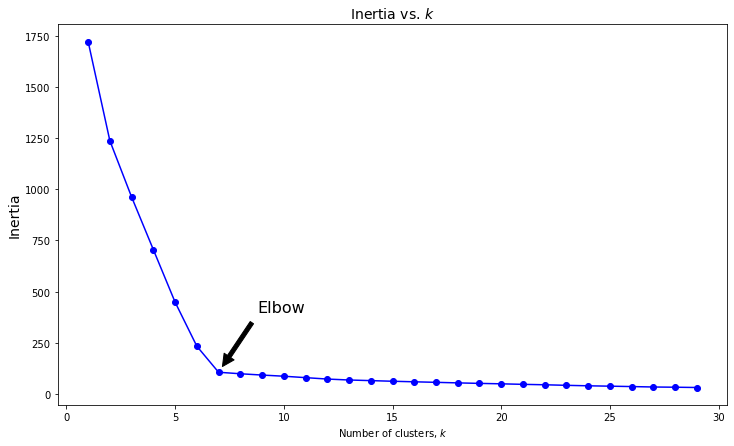

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.figure(figsize=(12, 7))
plt.plot(range(1, 30), inertias, 'bo-')
plt.title('Inertia vs. $k$', fontsize=14)
plt.xlabel('Number of clusters, $k$')
plt.ylabel('Inertia', fontsize=14) 
plt.annotate('Elbow',
             xy=(7, inertias[6]),
             xytext=(0.35, 0.30),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

From the graph above, it is clear that `the optimum number of clusters is 7`, it is when the `within cluster sum of squares (WCSS)`, or `inertia`, doesn't decrease significantly with every iteration. 

## 3. The Silhouette Score Method for Finding Optimal N_Clusters

In [5]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 30), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

NameError: name 'silhouette_scores' is not defined

<Figure size 576x216 with 0 Axes>

In [ ]:
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in k_means]

In [ ]:
k_means.labels_

In [ ]:
np.unique(k_means.labels_, return_counts=True)

In [ ]:
print(range(4,8))

In [ ]:
silhouette_scores

In [ ]:
np.unique(silhouette_scores, return_counts=True)